#### Pridicting Heart Disease by using Neural Networks.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data 
2. Create Training and Testing Datasets
3. Building and Training the Neural Network
4. Improving Results - A Binary Classification Problem
5. Results and Metrics


#### To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

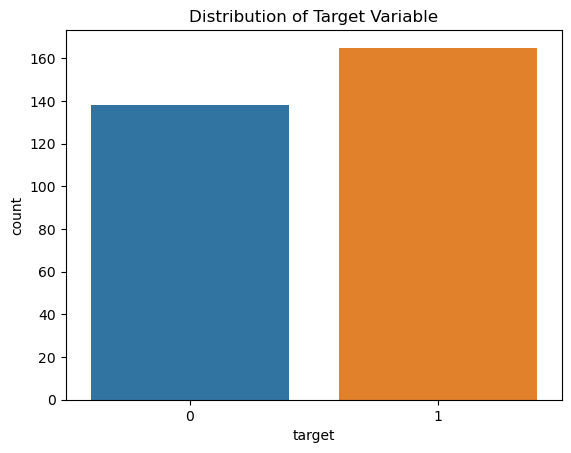

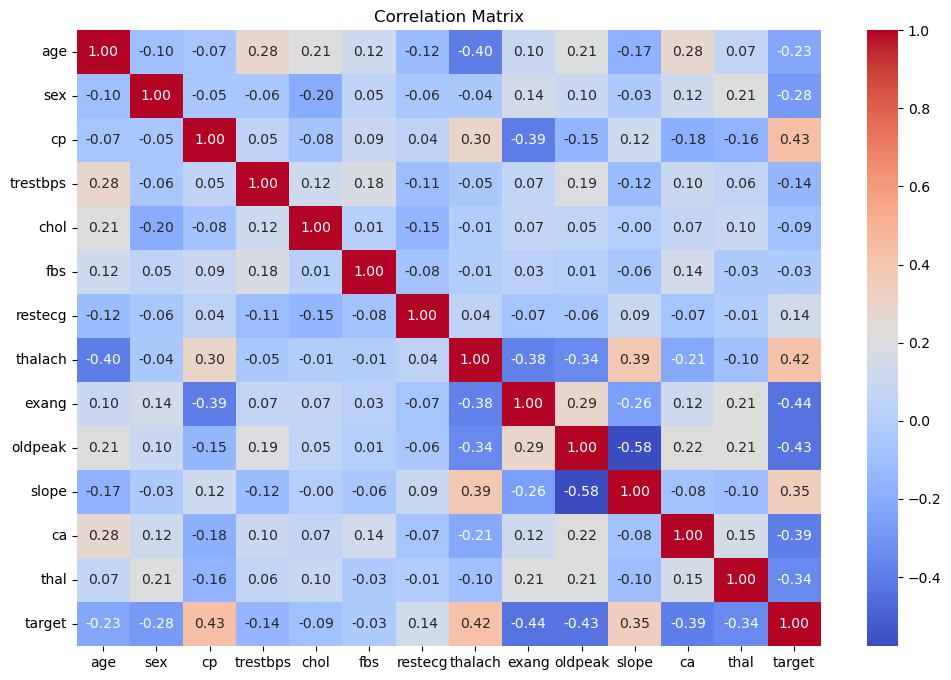

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


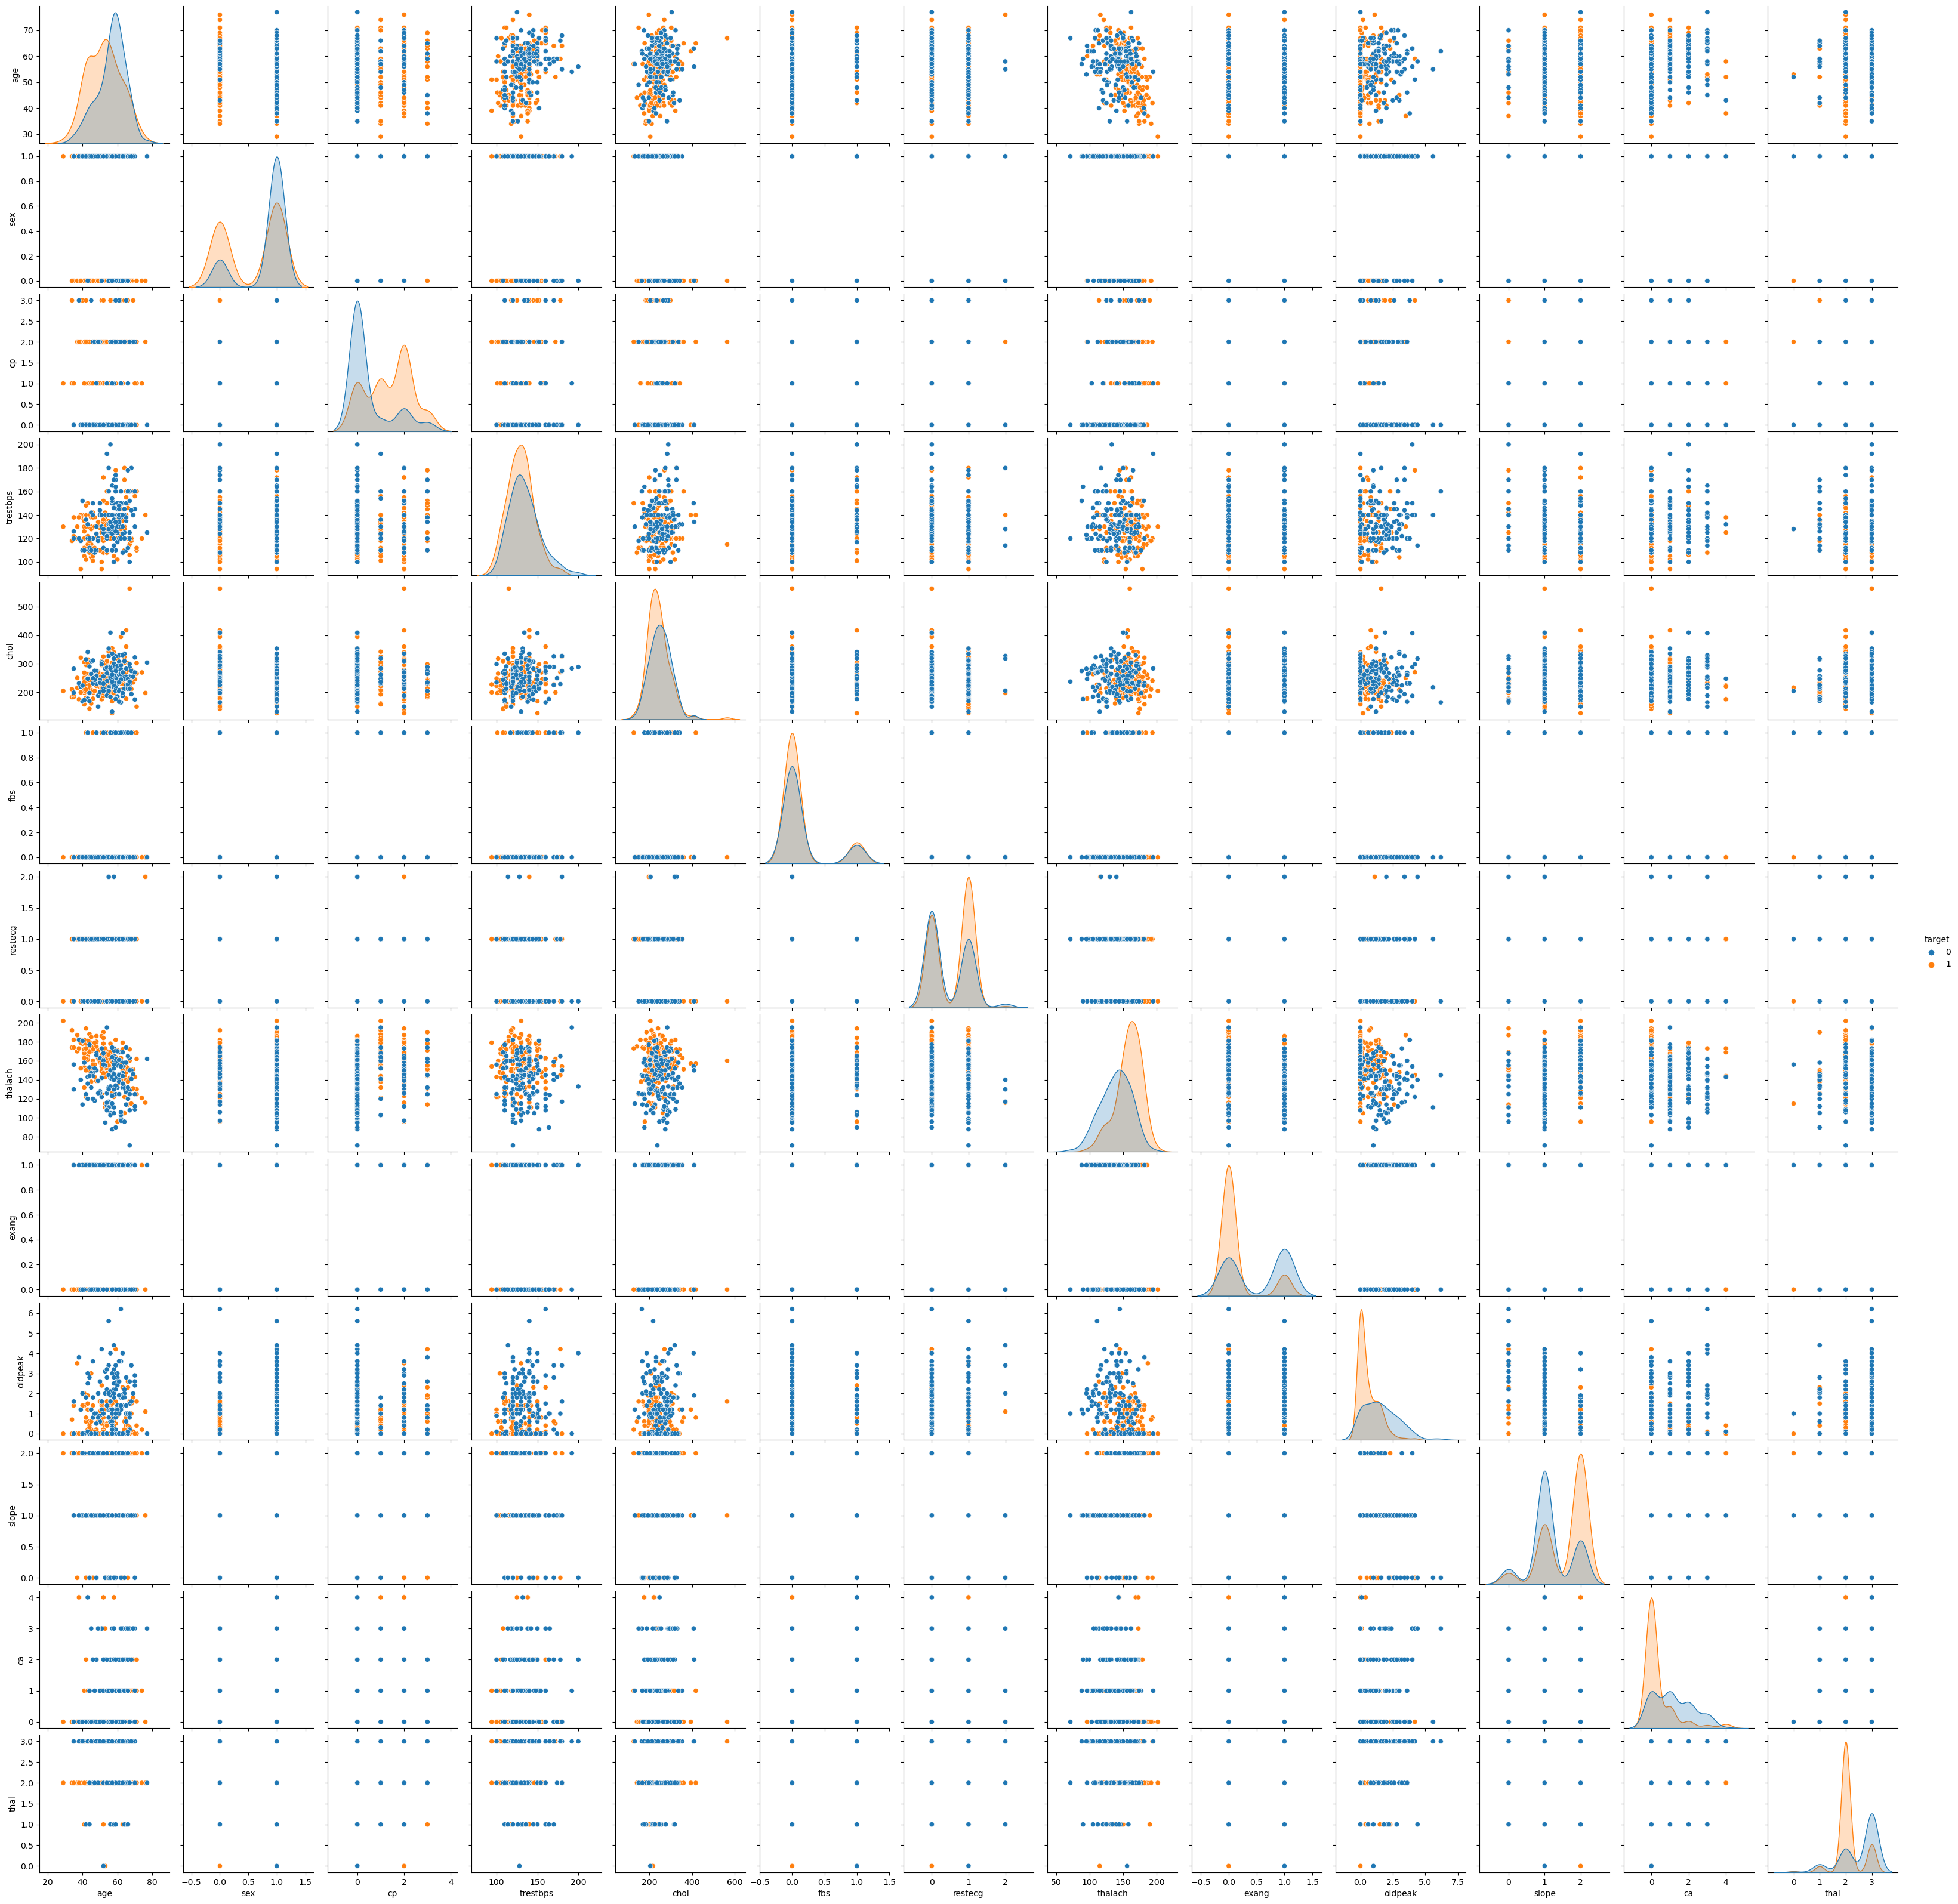

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Download the dataset from Google Drive
file_url = 'https://drive.google.com/uc?export=download&id=1R5SjStkUsgTgyoAjC_14v13siYh8AAF3'
dest_path = 'heart_disease.csv'

r = requests.get(file_url, allow_redirects=True)
with open(dest_path, 'wb') as file:
    file.write(r.content)

# Load the dataset
df = pd.read_csv(dest_path)

# Display the first few rows of the dataset
print(df.head())

# Basic information about the dataset
print(df.info())

# Statistical summary of the dataset
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

# Distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot of the dataset
sns.pairplot(df, hue='target')
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Check for missing values
missing_values = data.isnull().sum()

# Encode categorical variables if any (assuming 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' are categorical)
data_encoded = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Normalize the data
scaler = StandardScaler()
features = data_encoded.drop('target', axis=1)
features_scaled = scaler.fit_transform(features)
target = data_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
classification_rep = classification_report(y_test, y_pred)

# Display metrics
accuracy, precision, recall, f1, roc_auc, classification_rep, missing_values


(0.8688524590163934,
 0.875,
 0.875,
 0.875,
 0.9272629310344827,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.86      0.86        29\n           1       0.88      0.88      0.88        32\n\n    accuracy                           0.87        61\n   macro avg       0.87      0.87      0.87        61\nweighted avg       0.87      0.87      0.87        61\n',
 age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


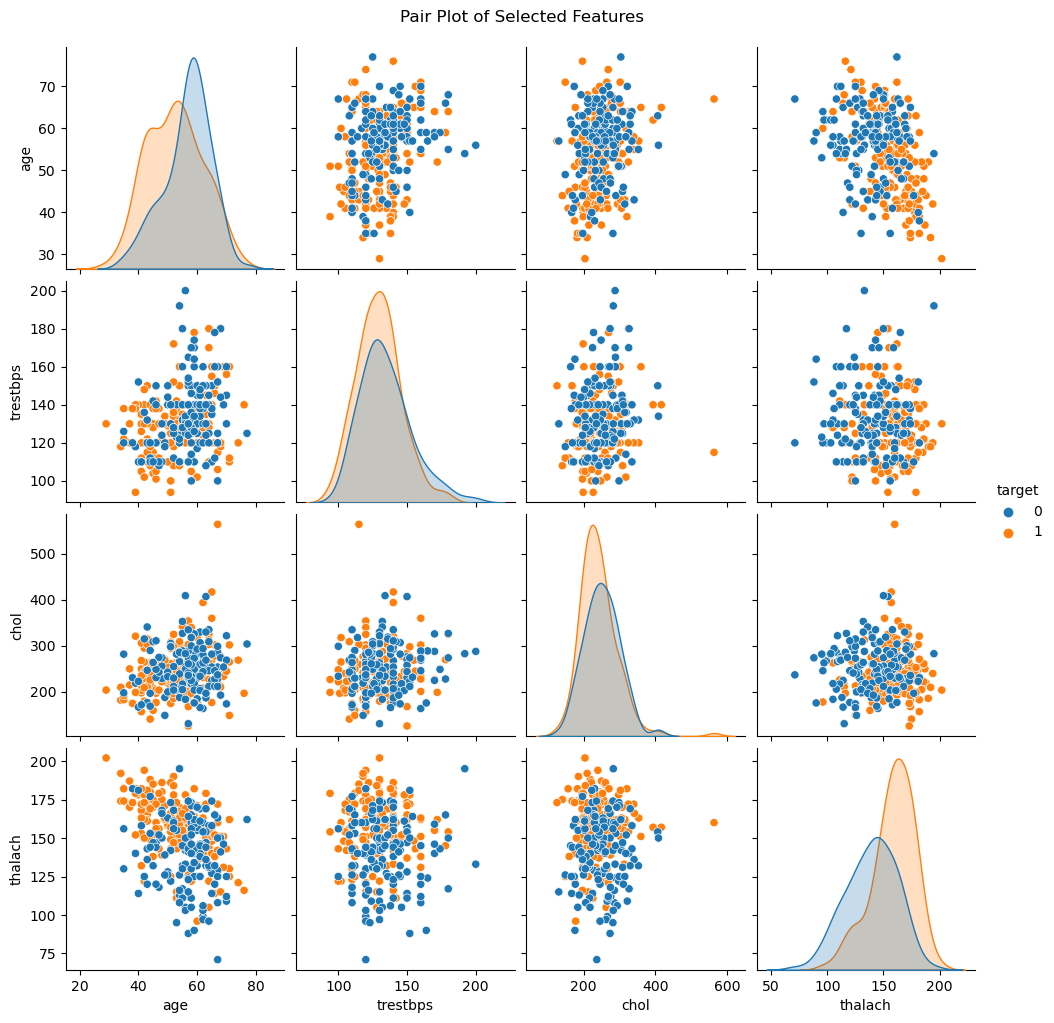

In [30]:
# Pair plot
sns.pairplot(data, hue='target', vars=['age', 'trestbps', 'chol', 'thalach'])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


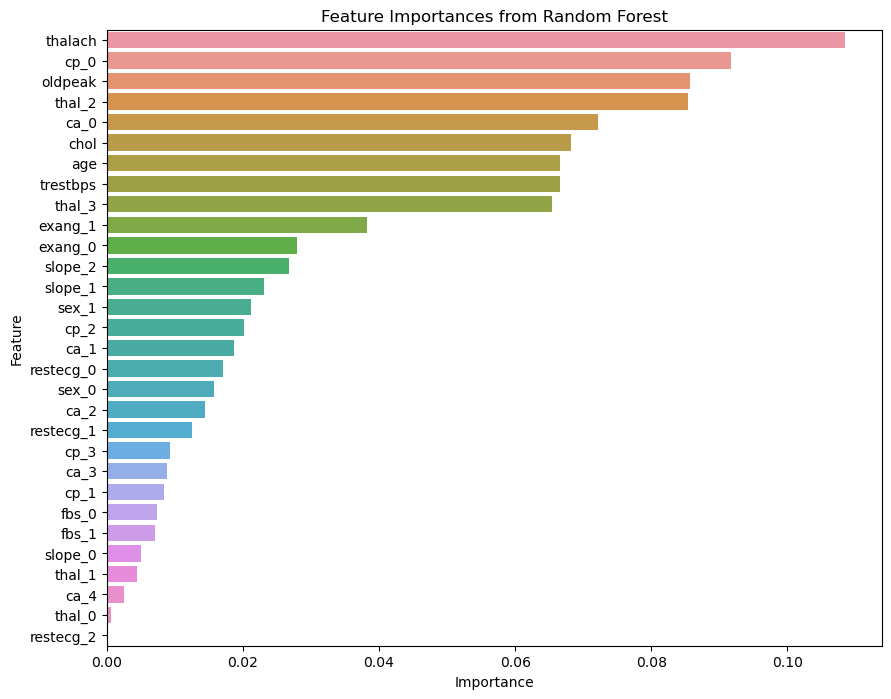

In [38]:
# Feature importances from Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
features = data_encoded.drop('target', axis=1)
target = data_encoded['target']
classifier = RandomForestClassifier(random_state=42)
classifier.fit(features, target)

# Get feature importances
importances = classifier.feature_importances_
feature_names = features.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


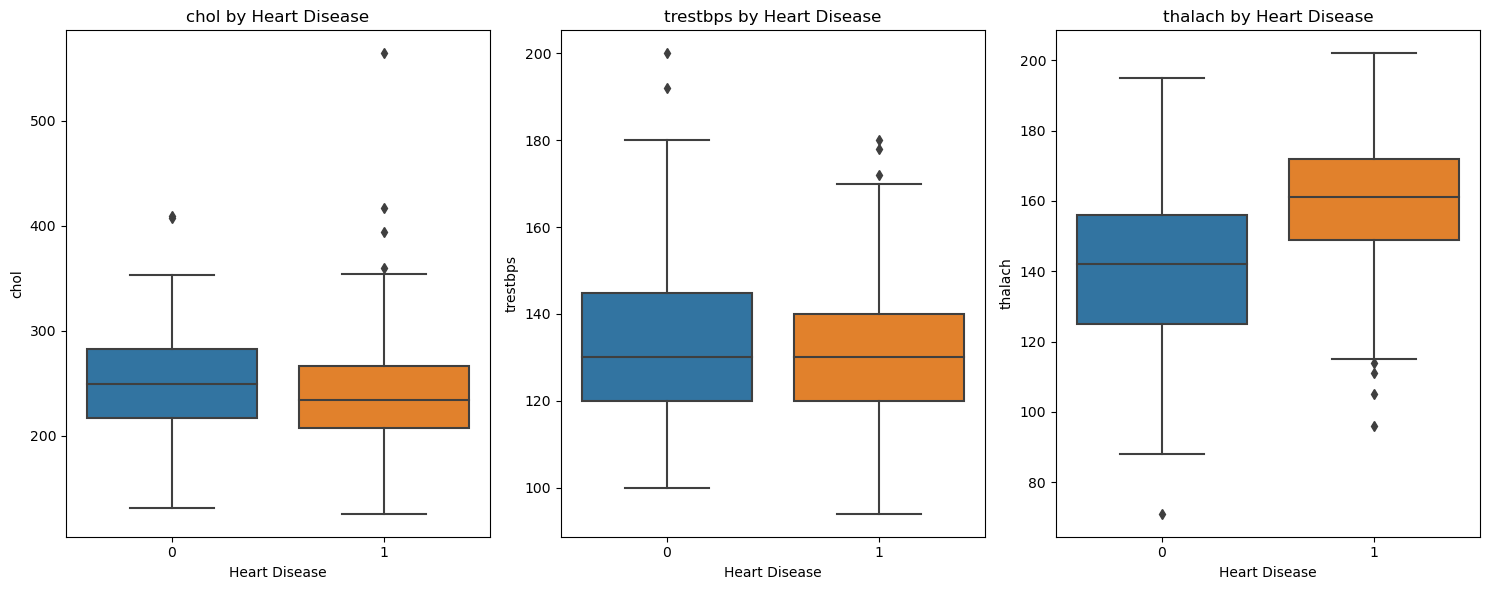

In [46]:
# Box plots for cholesterol, resting blood pressure, and maximum heart rate
features_to_plot = ['chol', 'trestbps', 'thalach']

plt.figure(figsize=(15, 6))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=data, x='target', y=feature)
    plt.title(f'{feature} by Heart Disease')
    plt.xlabel('Heart Disease')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


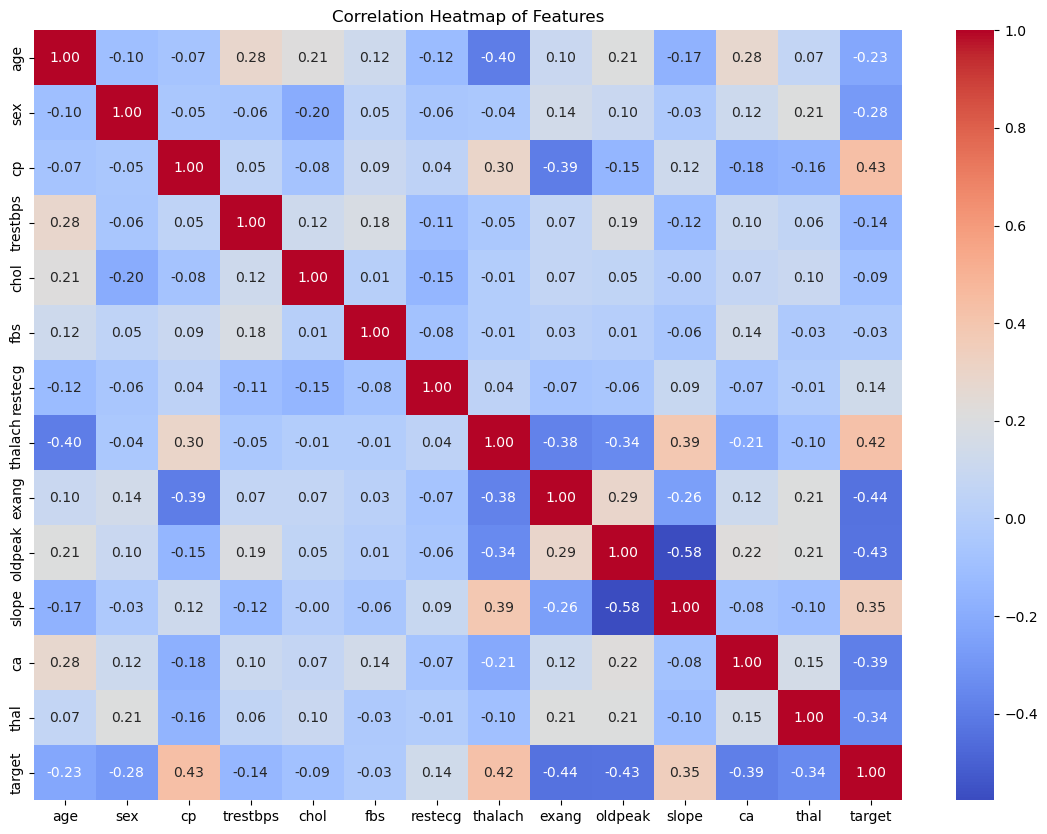

In [54]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


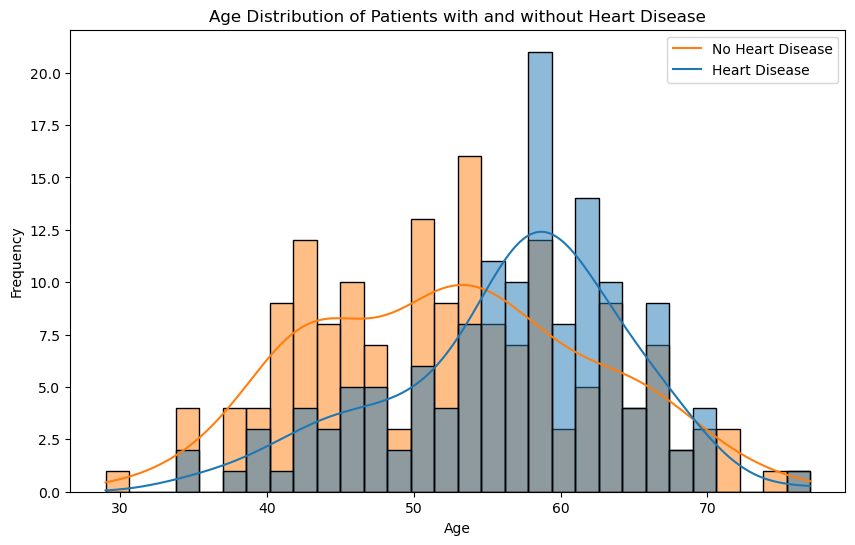

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data, x='age', hue='target', kde=True, bins=30)
plt.title('Age Distribution of Patients with and without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()


In [70]:
# Basic information
print(data.info())

# Summary statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

In [78]:
# Check for missing values
print(data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


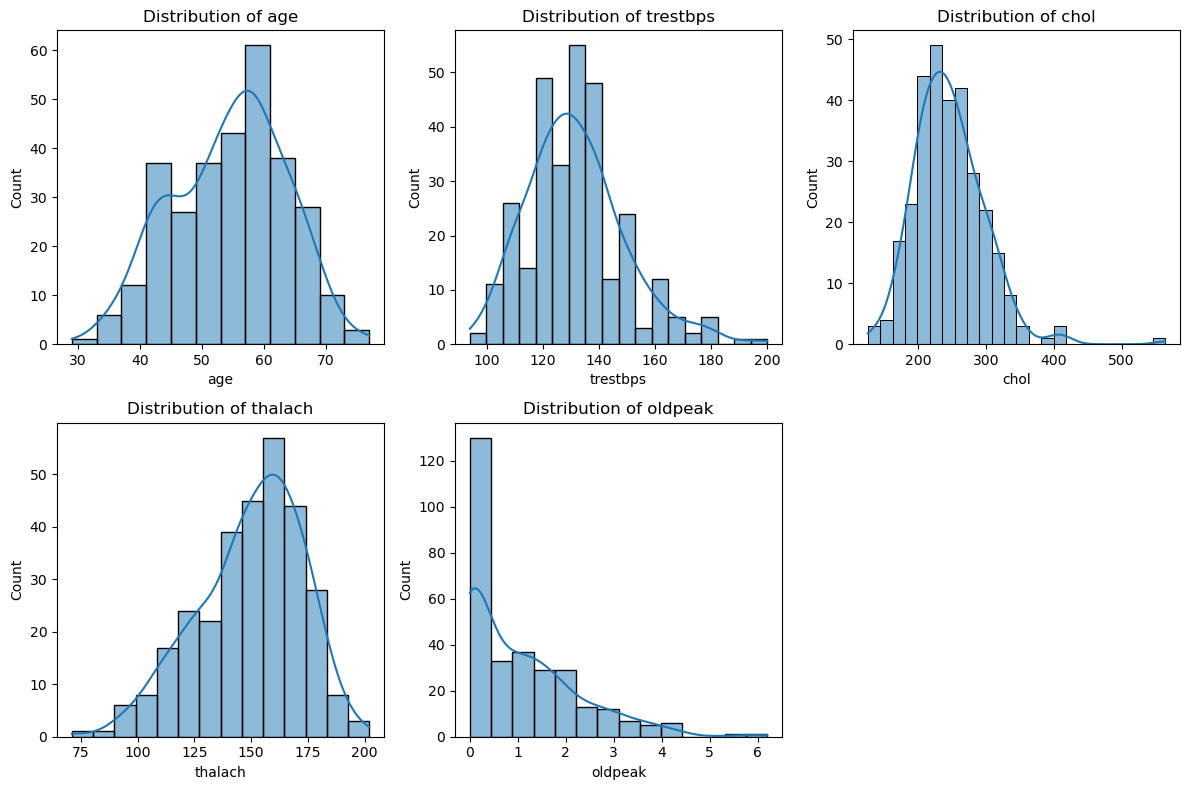

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


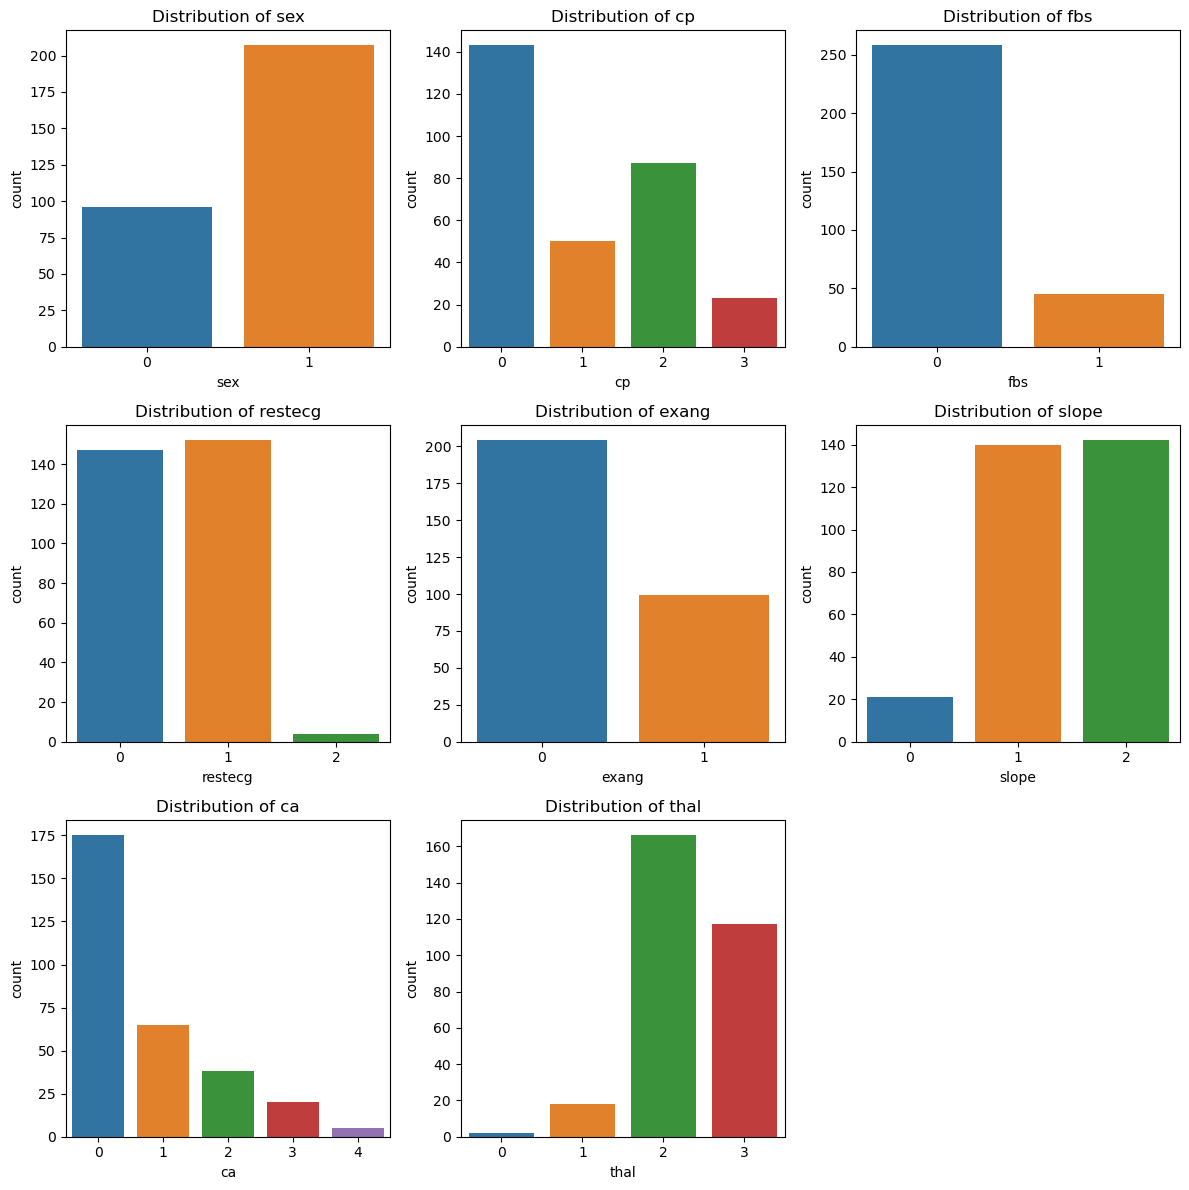

In [94]:
# Plot bar charts for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(12, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbp

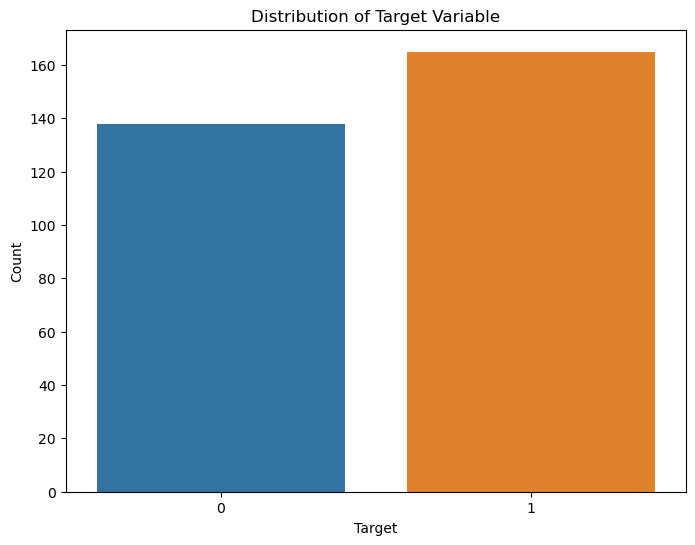

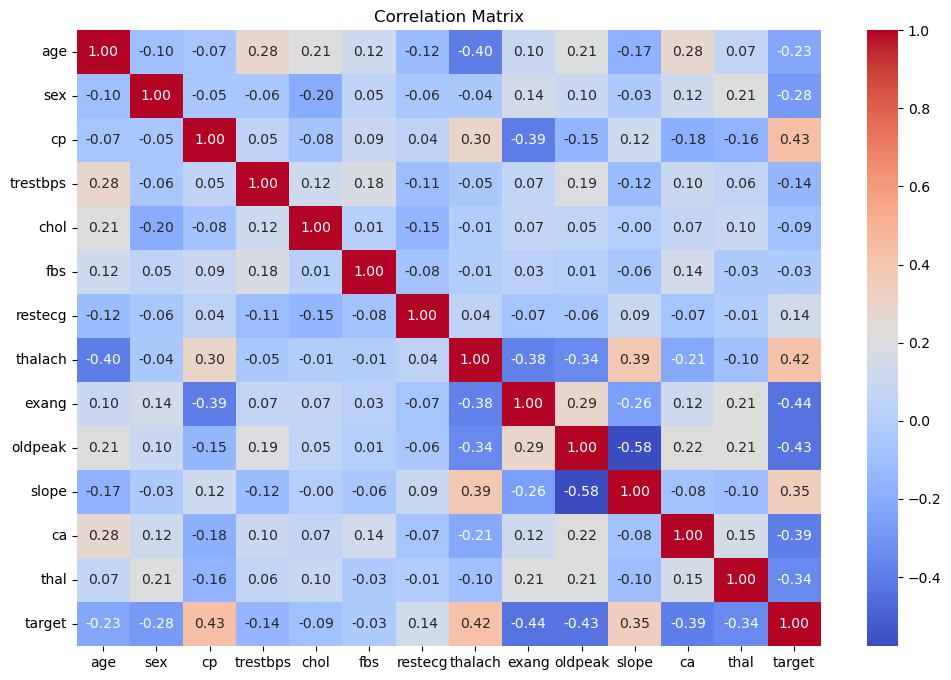

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'heart_disease.csv'  # Adjust the path if necessary
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())

# Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(df.describe())

# Checking for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot of the dataset (uncomment if working in an environment that supports it)
# sns.pairplot(df, hue='target')
# plt.show()


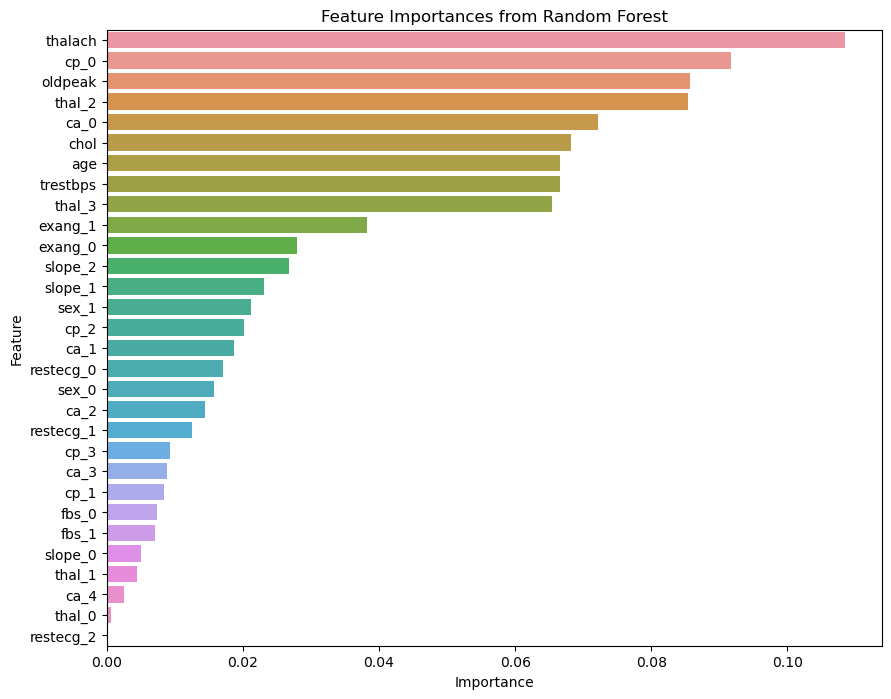

In [110]:
from sklearn.ensemble import RandomForestClassifier

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Train a Random Forest classifier
features = data_encoded.drop('target', axis=1)
target = data_encoded['target']
classifier = RandomForestClassifier(random_state=42)
classifier.fit(features, target)

# Get feature importances
importances = classifier.feature_importances_
feature_names = features.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'https://drive.google.com/uc?export=download&id=1R5SjStkUsgTgyoAjC_14v13siYh8AAF3'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbp

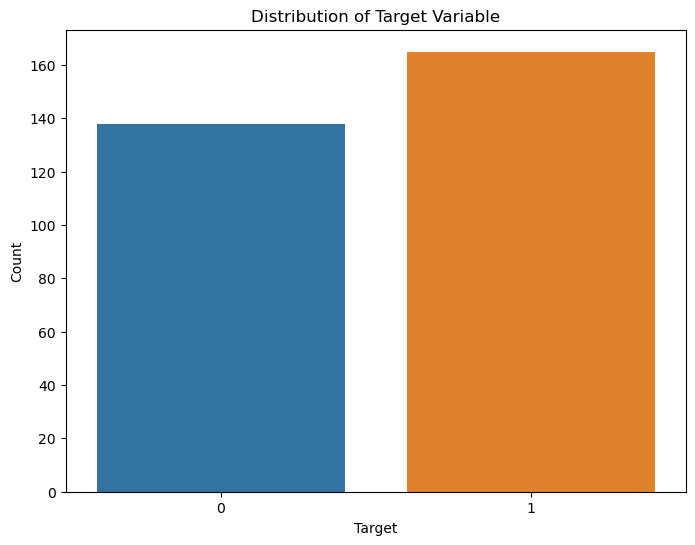

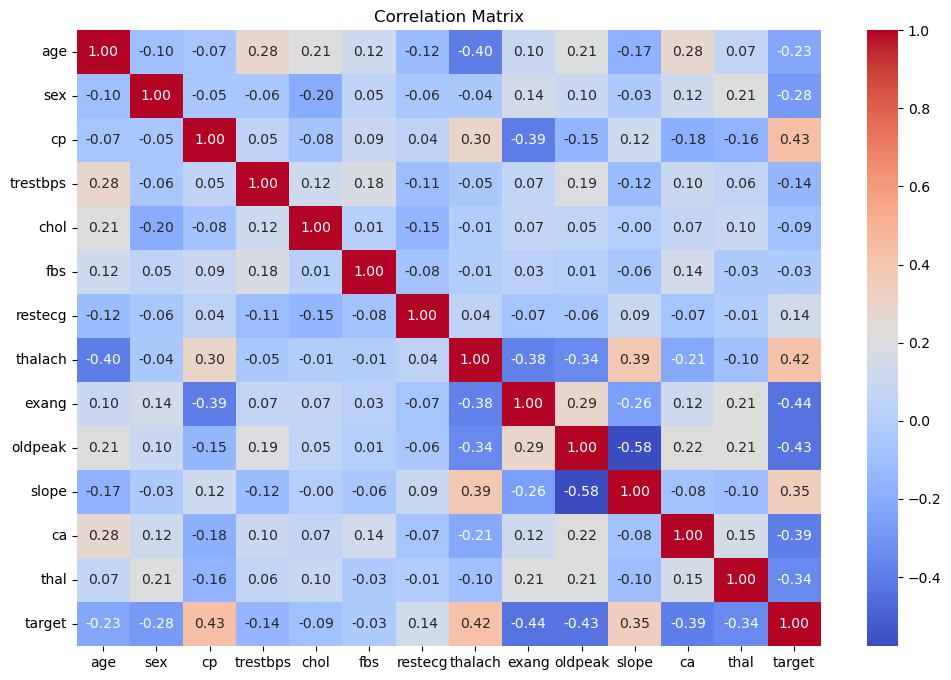

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'https://drive.google.com/uc?export=download&id=1R5SjStkUsgTgyoAjC_14v13siYh8AAF3'
df = pd.read_csv(file_path)

# Step 1: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Step 2: Basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())

# Step 3: Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
print(df.describe())

# Step 4: Checking for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Step 5: Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Step 6: Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'https://drive.google.com/uc?export=download&id=1R5SjStkUsgTgyoAjC_14v13siYh8AAF3'
df = pd.read_csv(file_path)

# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (242, 13) (242,)
Testing set shape: (61, 13) (61,)


In [ ]:
import pandas as pd

# Load the dataset
data_path = 'https://drive.google.com/uc?export=download&id=1R5SjStkUsgTgyoAjC_14v13siYh8AAF3'

heart_data = pd.read_csv(data_path)

# Display the first few rows of the dataset
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values
missing_values = heart_data.isnull().sum()

# Separate features and target
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

missing_values


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# Define the model with regularization (dropout)
def create_model():
    model = Sequential([
        Dense(16, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.5),  # Dropout layer to prevent overfitting
        Dense(8, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Implementing k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
for train_index, val_index in kf.split(X_scaled):
    X_train_fold, X_val_fold = X_scaled[train_index], X_scaled[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    model = create_model()
    
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    history = model.fit(X_train_fold, y_train_fold, 
                        validation_data=(X_val_fold, y_val_fold), 
                        epochs=100, 
                        batch_size=32, 
                        callbacks=[early_stopping],
                        verbose=1)
    
    # Evaluate the model
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[1]} of {scores[1]*100}%')
    fold_no += 1


ModuleNotFoundError: No module named 'tensorflow'

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Correct import statement
from tensorflow.keras.models import Sequential

# Other necessary imports
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data_path = 'https://drive.google.com/uc?export=download&id=1R5SjStkUsgTgyoAjC_14v13siYh8AAF3'

heart_data = pd.read_csv(data_path)

# Preprocess the data
X = heart_data.drop(columns=['target'])
y = heart_data['target']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model with regularization (dropout)
def create_model():
    model = Sequential([
        Dense(16, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.5),  # Dropout layer to prevent overfitting
        Dense(8, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the model
model = create_model()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {scores[1]*100:.2f}%')


ModuleNotFoundError: No module named 'tensorflow'